In [39]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 

In [40]:
csv_path = Path("data.csv")
data = pd.read_csv(csv_path)

In [41]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [42]:
data['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [43]:
X = data.copy()
X = data.drop(columns = 'Target')

In [44]:
y = data['Target']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [49]:
logistic_regression_model = LogisticRegression()

In [50]:
logistic_regression_model.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
train_score = logistic_regression_model.score(X_train_scaled, y_train)
test_score = logistic_regression_model.score(X_test_scaled, y_test)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [52]:
print(f"Training Accuracy: {train_score:.4f}")
print(f"Testing Accuracy: {test_score:.4f}")

Training Accuracy: 0.7131
Testing Accuracy: 0.6980


In [53]:
y_prediction = logistic_regression_model.predict(X_test_scaled)

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_prediction})
print(results_df.head(10))

        Actual Predicted
1255   Dropout   Dropout
3458  Graduate  Graduate
3390  Graduate  Graduate
1497  Graduate  Graduate
1536   Dropout   Dropout
287   Graduate   Dropout
3416  Enrolled  Graduate
1366   Dropout  Graduate
3926  Graduate  Graduate
1055  Graduate  Graduate


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [54]:
acc = accuracy_score(y_test, y_prediction)
print(f'Model Accuracy: {acc:.4f}')

Model Accuracy: 0.6980


In [56]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load the data
csv_path = Path("data.csv")
df = pd.read_csv(csv_path)

# Data Cleaning and Preprocessing
df.rename(columns={'Daytime/evening attendance ': 'Daytime/evening attendance'}, inplace=True)
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].mean())
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])
categorical_cols = ['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', "Nacionality", "Mother's qualification", "Father's qualification", "Gender", "Scholarship holder", "International"]
df = pd.get_dummies(df, columns=categorical_cols, dummy_na=False)

# Separate features (X) and target (y)
X = df.drop("Target", axis=1)
y = df["Target"]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### --- Random Forest Optimization --- ###
print("\n--- Random Forest Optimization ---")

# Define hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform hyperparameter tuning using RandomizedSearchCV
rf_rand_search = RandomizedSearchCV(estimator=rf,
                                     param_distributions=rf_param_grid,
                                     cv=3,
                                     n_iter=10,
                                     scoring='accuracy',
                                     random_state=42,
                                     error_score='raise')

# Perform the search on the training data
rf_rand_search.fit(X_train, y_train)

# Get the best model and its parameters
best_rf = rf_rand_search.best_estimator_
best_rf_params = rf_rand_search.best_params_

# Evaluate the best model on the test set
rf_y_pred = best_rf.predict(X_test)

# Print the results
print("Random Forest Best Parameters:", best_rf_params)
print("Random Forest Test Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred))

### --- Logistic Regression Optimization --- ###
print("\n--- Logistic Regression Optimization ---")

# Define hyperparameter grid for Logistic Regression
lr_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']  # Solver suitable for L1 and L2 regularization
}

# Initialize Logistic Regression
lr = LogisticRegression(random_state=42)

# Perform hyperparameter tuning using RandomizedSearchCV
lr_rand_search = RandomizedSearchCV(estimator=lr,
                                     param_distributions=lr_param_grid,
                                     cv=3,
                                     n_iter=10,
                                     scoring='accuracy',
                                     random_state=42,
                                     error_score='raise')

# Perform the search on the training data
lr_rand_search.fit(X_train, y_train)

# Get the best model and its parameters
best_lr = lr_rand_search.best_estimator_
best_lr_params = lr_rand_search.best_params_

# Evaluate the best model on the test set
lr_y_pred = best_lr.predict(X_test)

# Print the results
print("Logistic Regression Best Parameters:", best_lr_params)
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, lr_y_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_y_pred))

### --- Comparison and Documentation --- ###
print("\n--- Comparison ---")
print("Random Forest Best Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Logistic Regression Best Accuracy:", accuracy_score(y_test, lr_y_pred))

print("\n--- Documentation ---")
print("1. Data Loading: The dataset was loaded from 'data.csv'.")
print("2. Data Cleaning: Missing values were imputed using the mean for numeric columns and the mode for object columns.")
print("3. Encoding: The target variable was encoded using LabelEncoder, and categorical features were converted to dummy variables.")
print("4. Scaling: The data was scaled using StandardScaler.")
print("5. Model Training: Both Random Forest and Logistic Regression models were trained using RandomizedSearchCV for hyperparameter tuning.")
print("6. Hyperparameter Tuning: RandomizedSearchCV was used to find the best hyperparameters for each model using cross-validation.")
print("7. Evaluation: The best models were evaluated on the test set, and the results were printed, including accuracy and classification reports.")



--- Random Forest Optimization ---
Random Forest Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}
Random Forest Test Accuracy: 0.7559322033898305
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.75      0.79       316
           1       0.57      0.26      0.36       151
           2       0.74      0.94      0.83       418

    accuracy                           0.76       885
   macro avg       0.72      0.65      0.66       885
weighted avg       0.74      0.76      0.73       885


--- Logistic Regression Optimization ---
Logistic Regression Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.23357214690901212}
Logistic Regression Test Accuracy: 0.7649717514124293
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.80       316
   

Rows: The three rows represent the classes in the target variable. Based on the notebook, these are likely:

0: Dropout

1: Enrolled

2: Graduate

precision: Of all the instances the model predicted as a certain class, what proportion was correct?

Class 0 (Dropout): 0.84 - When the model predicts "Dropout", it's correct 84% of the time.

Class 1 (Enrolled): 0.53 - When the model predicts "Enrolled", it's correct 53% of the time.

Class 2 (Graduate): 0.75 - When the model predicts "Graduate", it's correct 75% of the time.

recall: Of all the instances that actually belong to a certain class, what proportion did the model correctly predict?

Class 0 (Dropout): 0.76 - The model correctly identifies 76% of actual "Dropout" instances.

Class 1 (Enrolled): 0.26 - The model correctly identifies 26% of actual "Enrolled" instances.

Class 2 (Graduate): 0.94 - The model correctly identifies 94% of actual "Graduate" instances.

f1-score: The harmonic mean of precision and recall, providing a balanced measure of the model's accuracy for each class.

Class 0 (Dropout): 0.79

Class 1 (Enrolled): 0.35

Class 2 (Graduate): 0.84

support: The number of actual occurrences of each class in the test set.

Class 0 (Dropout): 316 instances

Class 1 (Enrolled): 151 instances

Class 2 (Graduate): 418 instances

macro avg: The average of the precision, recall, and F1-score, giving equal weight to each class.

weighted avg: The average of the precision, recall, and F1-score, weighted by the number of samples in each class.

Interpretation and Analysis:
The model performs best at identifying "Graduate" students (class 2), with high recall and F1-score.

The model struggles with "Enrolled" students (class 1), with a very low recall. This suggests that the model often misclassifies "Enrolled" students as either "Dropout" or "Graduate".

The precision for "Enrolled" students is also relatively low, indicating that when the model predicts "Enrolled", it's often incorrect.

The overall accuracy is 76%, but the weighted average F1-score (0.74) gives a more balanced view, considering the class imbalance.

Random Forest Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}
Random Forest Test Accuracy: 0.7559322033898305
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.75      0.79       316
           1       0.56      0.26      0.36       151
           2       0.74      0.94      0.83       418

    accuracy                           0.76       885
   macro avg       0.71      0.65      0.66       885
weighted avg       0.74      0.76      0.73       885


Feature Importances:
                                 Feature  Importance
19   Curricular units 2nd sem (approved)    0.167388
13   Curricular units 1st sem (approved)    0.103062
20      Curricular units 2nd sem (grade)    0.080975
14      Curricular units 1st sem (grade)    0.064060
8                Tuition fees up to date    0.043828
..                                   ...         ...

C:\temp\ipykernel_117492\2954050660.py:94: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


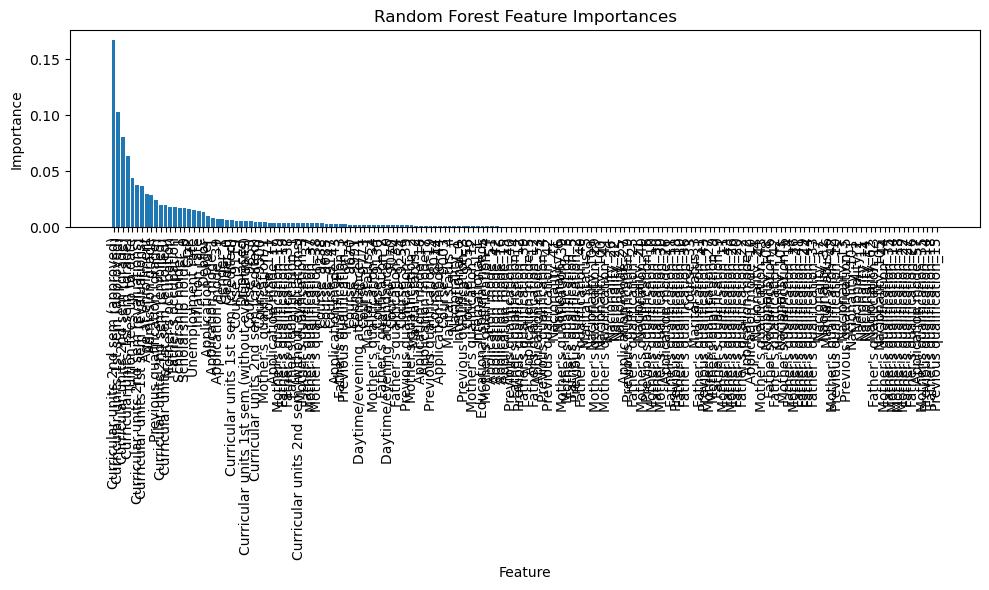


Selected Features:
['Curricular units 2nd sem (approved)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (grade)', 'Tuition fees up to date', 'Curricular units 2nd sem (evaluations)', 'Curricular units 1st sem (evaluations)', 'Age at enrollment', 'Admission grade', 'Previous qualification (grade)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 1st sem (enrolled)', "Mother's occupation", "Father's occupation", 'Scholarship holder_1', 'Scholarship holder_0', 'GDP', 'Unemployment rate', 'Inflation rate', 'Debtor']

Performance with Selected Features:
Test Accuracy: 0.768361581920904
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80       316
           1       0.53      0.34      0.42       151
           2       0.77      0.93      0.84       418

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.69       

In [61]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Load the data
csv_path = Path("data.csv")
df = pd.read_csv(csv_path)

# Data Cleaning and Preprocessing
df.rename(columns={'Daytime/evening attendance ': 'Daytime/evening attendance'}, inplace=True)
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].mean())
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])
categorical_cols = ['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', "Nacionality", "Mother's qualification", "Father's qualification", "Gender", "Scholarship holder", "International"]
df = pd.get_dummies(df, columns=categorical_cols, dummy_na=False)

# Separate features (X) and target (y)
X = df.drop("Target", axis=1)
y = df["Target"]

# Split data into training and testing sets *before* scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale training data
X_test_scaled = scaler.transform(X_test)        # Scale test data

# Convert scaled data back to DataFrame to retain column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Define hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform hyperparameter tuning using RandomizedSearchCV
rf_rand_search = RandomizedSearchCV(estimator=rf,
                                     param_distributions=rf_param_grid,
                                     cv=3,
                                     n_iter=10,
                                     scoring='accuracy',
                                     random_state=42,
                                     error_score='raise')

# Perform the search on the training data
rf_rand_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_rf = rf_rand_search.best_estimator_
best_rf_params = rf_rand_search.best_params_

# Evaluate the best model on the test set
rf_y_pred = best_rf.predict(X_test_scaled)

# Print the results
print("Random Forest Best Parameters:", best_rf_params)
print("Random Forest Test Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred))

# Feature Importance
feature_importances = best_rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

# Select Features Based on Importance
threshold = 0.01  # Example threshold
selected_features = importance_df[importance_df['Importance'] > threshold]['Feature'].tolist()

print("\nSelected Features:")
print(selected_features)

# Create New Datasets with Selected Features
X_train_selected = X_train_scaled[selected_features]
X_test_selected = X_test_scaled[selected_features]

# Train a New Model with Selected Features
rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Evaluate the New Model
y_pred_selected = rf_selected.predict(X_test_selected)
print("\nPerformance with Selected Features:")
print("Test Accuracy:", accuracy_score(y_test, y_pred_selected))
print("Classification Report:\n", classification_report(y_test, y_pred_selected))